<img src="./unal.png" align=left width="150" height="150"></img>



$\,$
---

<h2 align="center"> RESULTADOS PRUEBA DE ESTADO ICFES (FactoClass)</h2>
<h3 align="center">Análisis de correspondencias simples (ACS)</h3>


$\;$

---

Se realiza un análisis de los resultados del examen de estado realizado por el ICFES en Colombia durante 2008. La tabla tiene 29 departamentos, incluyendo una fila que agrupa los departamentos de menos de 100 mil habitantes P01 : SAP;AMA; V ID; V AU;GUA.

Los departamentos se estructuran en 4 grupos según su población, en millones de habitantes: 

* P5: más de 2
* P4: entre 1 y 2
* P3: entre 0.5 y 1 
* P2: menor de 0.5.

La TC tiene 12 columnas, que es la clasificación combinada de la jornada del colegio:  C:completa, M:mañana y T:tarde y su categoía de rendimiento: inferior, medio, bajo y alto.

* Cinferior: Jornada Completa categoria inferior.
* Cbajo: Jornada Completa categoria baja.
* Cmedio: Jornada Completa categoria media.
* Cialto: Jornada Completa categoria alta.

* Minferior: Jornada Mañana categoria inferior.
* Mbajo: Jornada Mañana  categoria baja.
* Mmedio: Jornada Mañana  categoria media.
* MAlto: Jornada Mañana  categoria alta.

* Tinferior: Jornada Tarde categoria inferior.
* Tbajo: Jornada Tarde categoria baja.
* Tmedio: Jornada Tarde categoria media.
* TAlto: Jornada Tarde categoria alta.

In [2]:
library ( FactoClass )
data ( icfes08 )
head( icfes08 )

,Cinferior,Cbajo,Cmedio,Calto,Minferior,Mbajo,Mmedio,Malto,Tinferior,Tbajo,Tmedio,Talto
BOG,5,40,101,309,9,79,219,241,15,171,179,61
ANT,63,180,116,105,38,105,96,90,125,156,84,29
VAL,35,93,72,81,51,140,118,132,62,113,55,19
CUN,19,80,81,103,11,90,114,50,40,84,33,7
ATL,31,48,22,37,72,62,48,48,106,61,32,15
SAN,7,27,51,61,10,40,78,79,30,51,24,20


### Objetivo

El objetivo principal del análisis es comparar los perfiles departamentales según la calidad educativa de los colegios. También se desea explorar la influencia de la jornada sobre el ordenamiento de los departamentos y la influencia de su tamaño, en términos de población, incide en ese ordenamiento.

### Gráfica de perfiles

Perfiles de los departamentos según jornadas/rendimiento. Las letras C,M
y T indican las jornadas, las que además se diferencian con los colores elegidos.


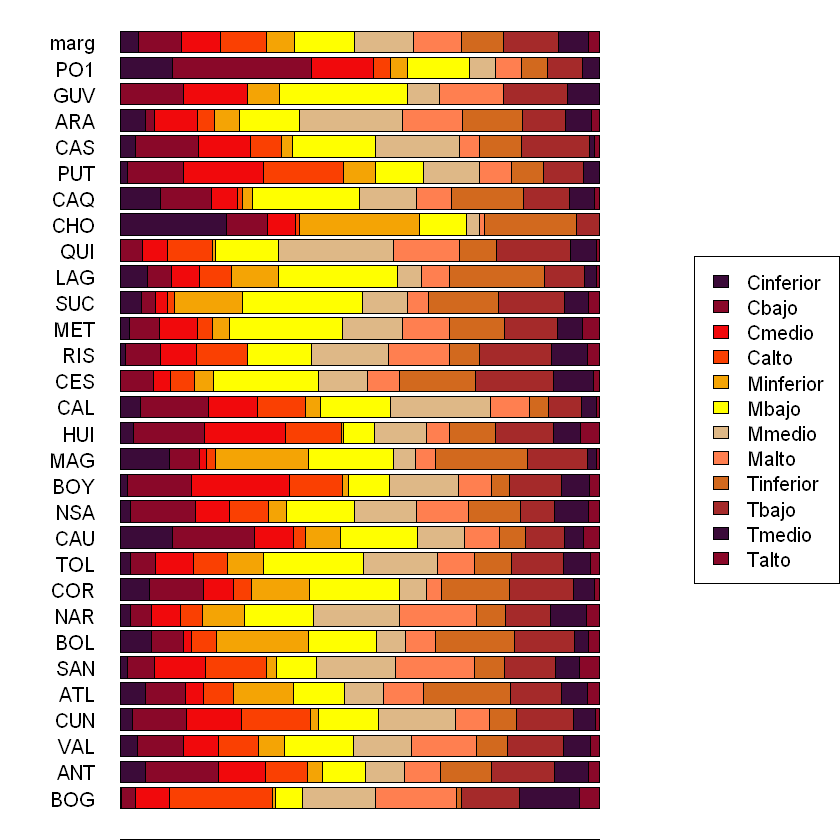

In [3]:
marron <-c(" burlywood "," coral "," chocolate "," brown ")
mycolors <-c("#3B0B39",  "#8A0829", "#F1090C", "#FA4002", "#F4A405","#FFFF00", marron )
par (mai =c(0 ,1 ,0 ,0))                        # Márgenes de la gráfica
plotct ( icfes08 ,"row",col= mycolors )
#dev. print ( device = xfig , file =" TCicfesPerpilesDeptos .fig ")


Nótese que Chocó se diferencia bastante de los demás departamentos: tiene las barras de rendimiento inferior, en las tres jornadas de mayor longitud que en los demás departamentos.

Esto se evidencia en el ACS de tabla, pues muestra al Choco alejado de los demás departamentos. Entonces se toma para este análisis al Chocó como ilustrativo, para poder ver mejor las diferencias de los demás departamentos.

A continuación se realiza el Análisis de valores propios sin el departamento Choco, puesto que será tomada como variable ilustrativa.

Duality diagramm
class: coa dudi
$call: dudi.coa(df = tab, scannf = FALSE, nf = 3)

$nf: 3 axis-components saved
$rank: 11
eigen values: 0.1508 0.04946 0.0229 0.0126 0.009578 ...
  vector length mode    content       
1 $cw    12     numeric column weights
2 $lw    28     numeric row weights   
3 $eig   11     numeric eigen values  

  data.frame nrow ncol content             
1 $tab       28   12   modified array      
2 $li        28   3    row coordinates     
3 $l1        28   3    row normed scores   
4 $co        12   3    column coordinates  
5 $c1        12   3    column normed scores
other elements: N 

,Ax1,Ax2,Ax3,Ax4,Ax5,Ax6,Ax7,Ax8,Ax9,Ax10,Ax11
inertia,0.1507689,0.04945561,0.02289711,0.0126027,0.009577662,0.006486501,0.004632648,0.002868748,0.002318244,0.002049103,0.0011831
cum,0.1507689,0.20022447,0.22312157,0.2357243,0.245301936,0.251788437,0.256421085,0.259289833,0.261608077,0.263657179,0.2648403
cum(%),56.9282195,75.60196885,84.24759695,89.0062018,92.622593673,95.071806165,96.821029477,97.904228670,98.779565171,99.553277753,100.0000000


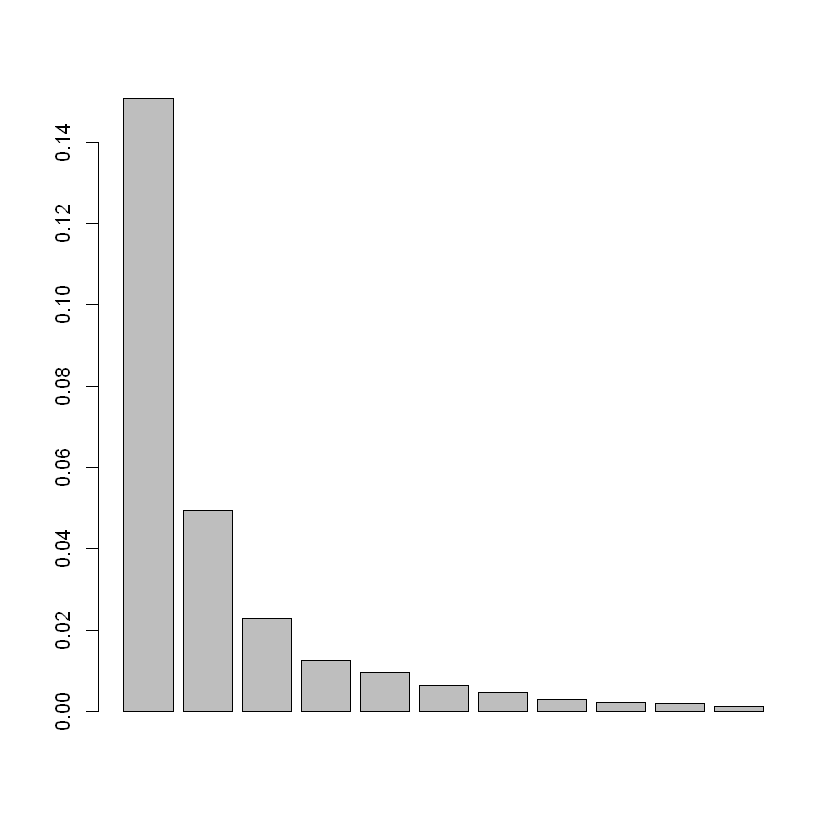

In [4]:
tab<-icfes08[ -23 ,]              # Choco no activa
acs<-dudi.coa (tab , scannf =FALSE ,nf =3);acs
barplot(acs $eig ) # histograma valores propios
valp <-t(inertia.dudi(acs)$tot.inertia);valp # valores propios

La varianza total asociada al ACS es 0.265, los tres primeros ejes retienen el 84.2% (0.151,59.9 %; 0.049, 18.7% y 0.023, 8.6 %). Los dos primeros retienen una inercia superior a la inercia promedio (0.024 = 0.265/11) (ver figura abajo).

Los dos primeros ejes (primer plano factorial), proveen una buena síntesis para analizar las asociaciones entre departamentos y jornadas * rendimiento. Sin embargo se incluyen las coordenadas y ayudas para la interpretación del tercer eje para afinar un poco análisis.



### Plano facorial y Variable Ilustrativa


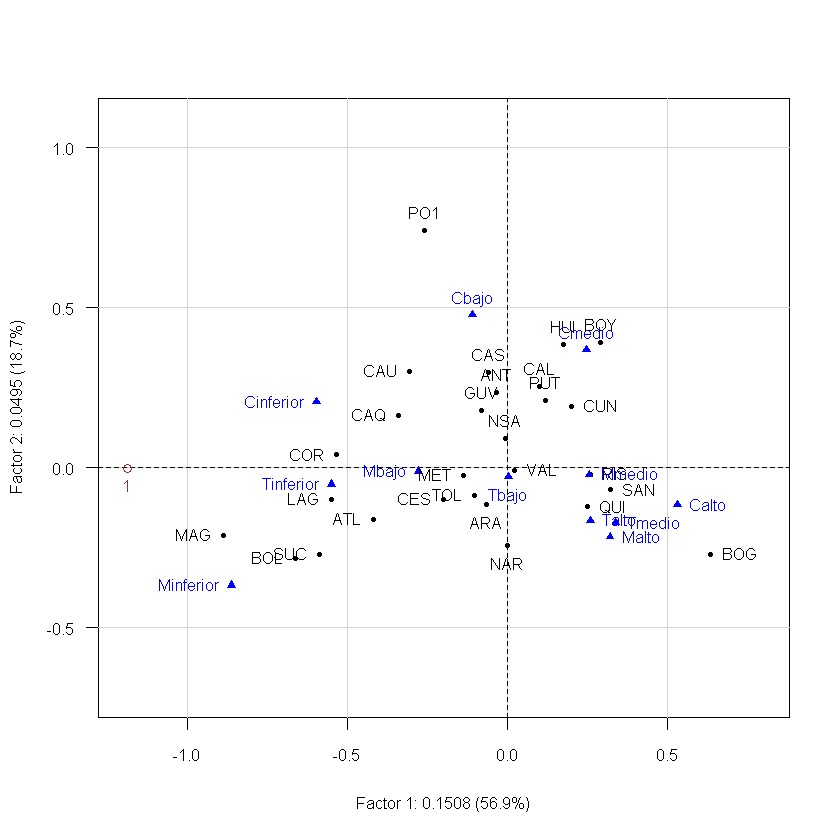

In [5]:
plot(acs , cframe =1, xlim =c( -1.2 ,0.8) ) # primer plano
Fchoco <- suprow(acs , icfes08 [23 ,])$lisup # proyección de Chocó como ilustrativa
points(Fchoco, col=" brown ")
text( Fchoco,col=" brown ",pos =1, cex =0.8)


El primer eje ordena las categorías de rendimiento de menor (izquierda) a mayor (derecha) y por lo tanto Bogotá es el de mejor rendimiento y Magdalena el departamento de peor rendimiento, aparte de Chocó que ya se había detectado con un perfil atípico por su rendimiento muy bajo.

El segundo eje muestra arriba las categorías inferior, baja y media de la jornada completa, lo que se debe a una atracción de los departamentos que tienen más porcentaje de colegios con esa jornada en su perfil.

El primer plano factorial presenta el efecto Guttman, que es una forma de parábola de las categorías de una variable ordinal. Nótese que por cada una de las tres jornadas, se ven las categorías de rendimiento como parábolas invertidas. En este efecto, el primer eje opone los rendimientos extremos inferior vs alto.  el segundo eje los medios (bajo y medio) de
los extremos.

#### Plano factorial 2-3

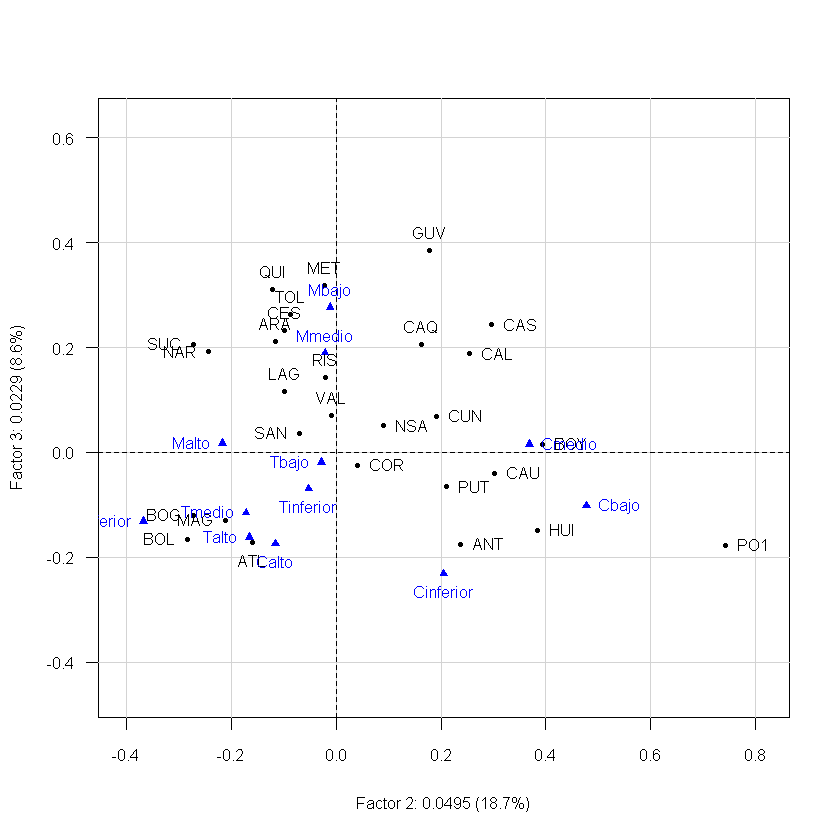

In [6]:
plot(acs,2,3, cframe =1.1) #,xlim =c ( -1.2 ,0.8) ) # plano 2-3

El tercer eje destaca al lado positivo las categorías baja y media de la jornada de la mañana, asociada a los departamentos:

* Meta
* Quindio
* Tolima
* Arauca

### Ayudas a la interpretación 


In [7]:
ayu <- inertia.dudi (acs ,T,T)
salayu <-data.frame( peso = acs$lw*100 , acs$li , con=ayu$row.abs/100 , cos=abs( ayu$row.rel )/ 100);salayu

,peso,Axis1,Axis2,Axis3,con.Axis1,con.Axis2,con.Axis3,cos.Axis1,cos.Axis2,cos.Axis3
BOG,14.2104216,0.6329871862,-0.271210631,-0.11924363,3.776462e-01,0.2113512494,0.0882463456,8.114600e-01,0.148967223,0.0287970273
ANT,11.8038982,-0.0348695889,0.236707823,-0.17507127,9.519354e-04,0.1337319308,0.1580063825,1.186322e-02,0.546681094,0.2990464114
VAL,9.6559268,0.0191795891,-0.008443784,0.07050209,2.355922e-04,0.0001392043,0.0209612610,1.407634e-02,0.002728258,0.1902020351
CUN,7.0803500,0.1993268501,0.191352826,0.06927289,1.865841e-02,0.0524214374,0.0148388678,3.403295e-01,0.313644588,0.0411050010
ATL,5.7875895,-0.4196538845,-0.160483856,-0.17139820,6.760341e-02,0.0301401119,0.0742556721,6.869729e-01,0.100466161,0.1145960388
SAN,4.7533811,0.3202627149,-0.068984936,0.03706156,3.233730e-02,0.0045739941,0.0028514747,6.550484e-01,0.030392692,0.0087721916
BOL,4.6837709,-0.6647145992,-0.283419991,-0.16584813,1.372633e-01,0.0760748387,0.0562647264,7.706864e-01,0.140109712,0.0479764863
NAR,3.4805091,-0.0001039412,-0.243119275,0.19183821,2.494057e-09,0.0415973823,0.0559412809,6.651097e-08,0.363878946,0.2265626720
COR,2.8639618,-0.5364500264,0.040324561,-0.02390454,5.466560e-02,0.0009416531,0.0007147387,9.281076e-01,0.005244198,0.0018428943
TOL,3.6793954,-0.1062003799,-0.086925259,0.26386047,2.752434e-03,0.0056215087,0.1118779604,1.044693e-01,0.069988821,0.6448895779



### Análisis de perfiles fila

El ordenamiento de las categorías se traslada a los departamentos mostrando una parábola invertida. Siguiéndola desde la izquierda hasta la derecha, se observa que los departamentos de la región Atlántico son los de menor rendimiento, siguen departamentos del sur del país,
luego los de la región Andina, y sobresalen Risaralda, Quindio y Santander, hasta llegar a Bogotá la de mayor rendimiento.

In [8]:
salayu <-data.frame ( peso = acs$cw*100 , acs$co , con= ayu$ col.abs/100 , cos= abs( ayu$
col.rel )/ 100);salayu
#xtable (salayu , digits = rep (2 ,12))

,peso,Comp1,Comp2,Comp3,con.Axis1,con.Axis2,con.Axis3,cos.Axis1,cos.Axis2,cos.Axis3
Cinferior,3.629674,-0.5991632806,0.20569035,-0.23127714,8.642638e-02,0.0310513071,0.0847915214,6.172017e-01,0.0727385405,0.0919606747
Cbajo,9.039379,-0.1115340873,0.47754979,-0.10151106,7.458341e-03,0.4168313408,0.0406803555,4.621336e-02,0.8472071535,0.0382806244
Cmedio,8.035004,0.2454811825,0.36817031,0.01547954,3.211522e-02,0.2202257321,0.0008408557,2.468274e-01,0.5552064174,0.0009814607
Calto,9.815036,0.5289040039,-0.11636879,-0.17394835,1.821101e-01,0.0268750535,0.1297035712,7.821012e-01,0.0378601453,0.0845960136
Minferior,5.499204,-0.8634468204,-0.36790688,-0.13124376,2.719314e-01,0.1505081834,0.0413691496,7.708442e-01,0.1399494610,0.0178095413
Mbajo,12.669053,-0.2802149867,-0.01172220,0.27682112,6.598045e-02,0.0003520035,0.4239962434,4.597776e-01,0.0008046064,0.4487076976
Mmedio,12.291169,0.2535253733,-0.02119482,0.18940790,5.239917e-02,0.0011164440,0.1925789518,5.179477e-01,0.0036199483,0.2890941165
Malto,10.013922,0.3187768127,-0.21632563,0.01736159,6.749413e-02,0.0947555396,0.0013182647,5.261191e-01,0.2422850504,0.0015605930
Tinferior,8.661496,-0.5522196001,-0.05208981,-0.06911987,1.751882e-01,0.0047520713,0.0180724935,7.914940e-01,0.0070425444,0.0124002303
Tbajo,11.525457,0.0009483103,-0.02856594,-0.01907580,6.874601e-07,0.0019016900,0.0018316516,3.217325e-05,0.0291938278,0.0130184485


Se utilizan las coordenadas sobre el primer eje para presentar los perfíles ordenando los departamentos, para que los parecidos queden vecinos en la figura siguiente. Los perfiles de la parte inferior son los peores y van mejorando a medida que se sube en la gráfica. El perfil superior es el marginal que se incluye como referencia para la comparación, ya que este perfíl se sitúa en el origen de la representación (coordenadas (0,0) en los planos) y la lejanía del centro de un punto, indica que el perfíl que representa es el más diferente del perfíl promedio (marginal).

### Perfiles de los departamentos ordenados por las coordenadas sobre el primer

eje del ACS. Los departamentos de la parte superior son los de mayor rendimiento

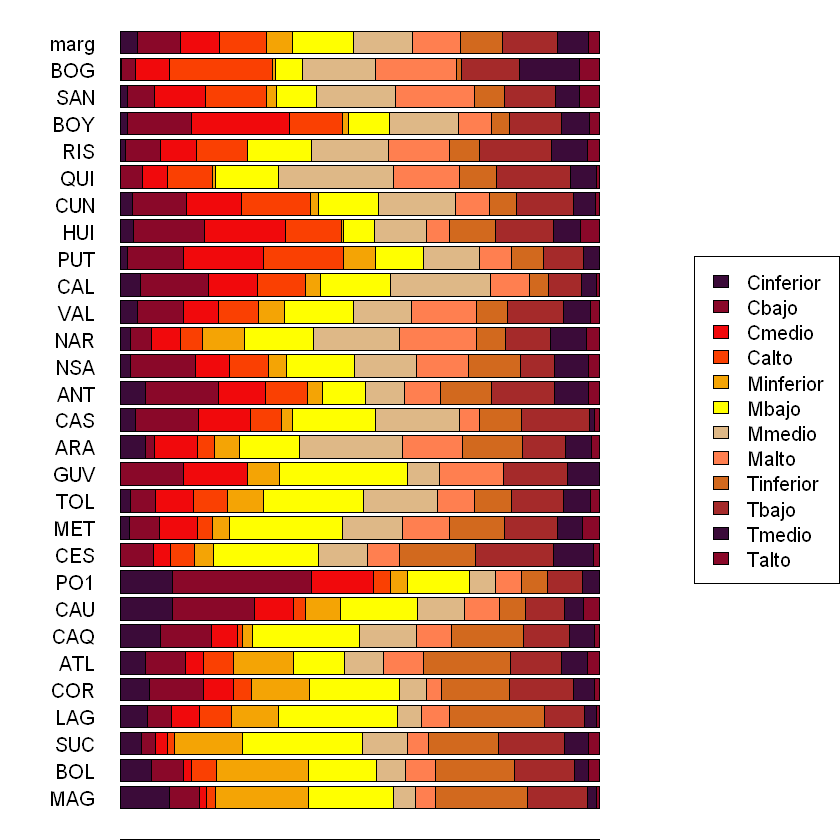

In [9]:
ordep <-order (acs$li [ ,1])
par (mai =c(0 ,1 ,0 ,0))
plotct (tab[ordep ,],"row",col= mycolors )

### Conclusiones

Los departamentos se ordenan en el primer plano factorial según el rendimiento de sus colegios. Bogotá es el de mayor rendimiento, Chocó es de lejos es de menor rendimiento. La figura anterior es un buen resumen del ordenamiento de los departamentos según su rendimiento en los resultados de examen del realizado por el ICFES.

Cada jornada ordena los departamentos de manera similar, pero la jornada de la tarde es la de menor dispersión.
